<a href="https://colab.research.google.com/github/lee191/LSTM/blob/main/DNN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특징추출

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

label
0    77054
1    14077
dtype: int64
protocol_type 
종류: ['tcp' 'udp' 'icmp'] 
개수: 3 

service 
종류: ['ftp_data' 'other' 'http' 'eco_i' 'telnet' 'private' 'domain_u' 'smtp'
 'netbios_dgm' 'urp_i' 'finger' 'ftp' 'gopher' 'ecr_i' 'sql_net' 'time'
 'ntp_u' 'remote_job' 'csnet_ns' 'ssh' 'auth' 'shell' 'pop_3' 'Z39_50'
 'IRC' 'pm_dump' 'link' 'systat' 'exec' 'iso_tsap' 'red_i' 'domain'
 'netbios_ns' 'echo' 'uucp_path' 'bgp' 'whois' 'nntp' 'kshell' 'X11'
 'klogin' 'ldap' 'name' 'discard' 'imap4' 'rje' 'http_443' 'pop_2'
 'netbios_ssn' 'mtp' 'netstat' 'daytime' 'sunrpc' 'urh_i' 'http_8001'
 'efs' 'supdup' 'ctf' 'nnsp' 'hostnames' 'courier' 'uucp' 'aol' 'vmnet'
 'tim_i' 'login' 'http_2784' 'printer' 'tftp_u' 'harvest'] 
개수: 70 

flag 
종류: ['SF' 'REJ' 'RSTR' 'SH' 'RSTO' 'S0' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 
개수: 11 

label 
종류: [0 1] 
개수: 2 

(72904, 41) (72904,)
(18227, 41) (18227,)
Accuracy: 1.00


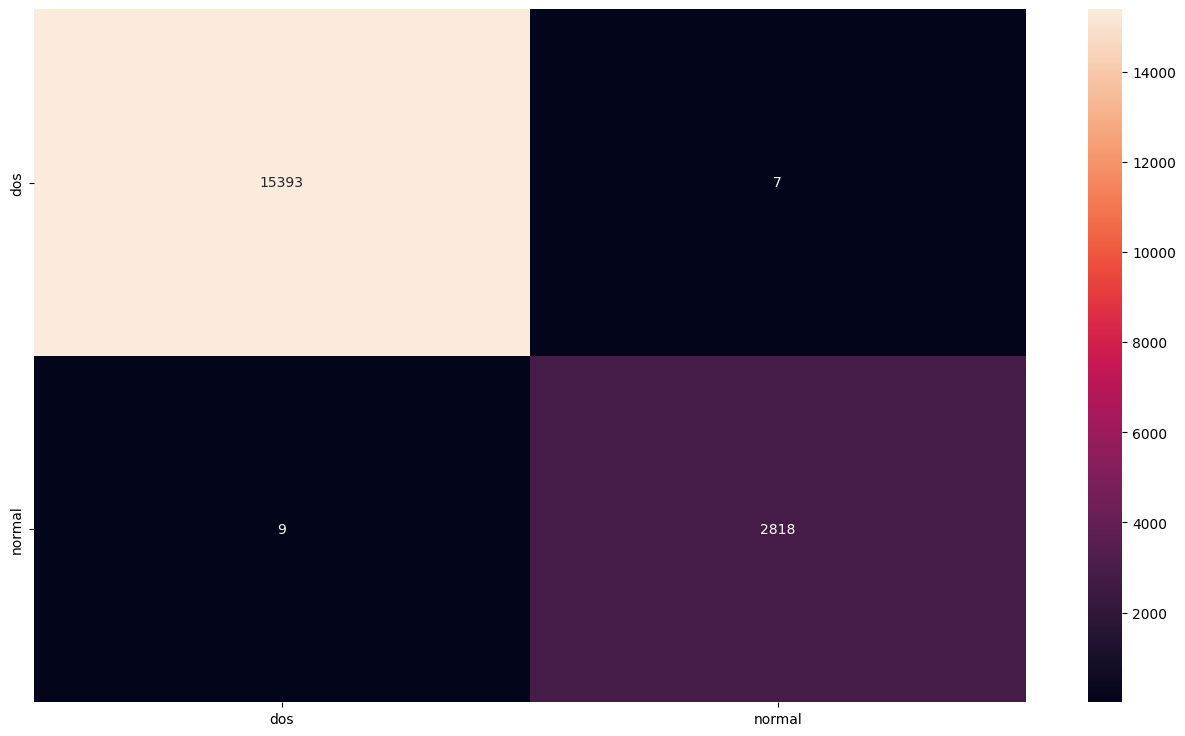

Index(['src_bytes', 'protocol_type', 'service', 'dst_host_same_srv_rate',
       'dst_bytes', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate',
       'dst_host_diff_srv_rate', 'dst_host_count', 'count', 'diff_srv_rate',
       'srv_count', 'dst_host_serror_rate', 'dst_host_srv_count',
       'same_srv_rate', 'flag', 'rerror_rate', 'duration', 'logged_in',
       'wrong_fragment', 'dst_host_srv_rerror_rate', 'num_outbound_cmds'],
      dtype='object')
        src_bytes  protocol_type     service  dst_host_same_srv_rate  \
40692 0.000000542    0.500000000 0.289855072             0.360000000   
30744 0.000000231    0.500000000 0.347826087             1.000000000   
23296 0.000000134    0.500000000 0.347826087             1.000000000   
7668  0.000000161    0.500000000 0.347826087             1.000000000   
61792 0.000000252    0.500000000 0.347826087             1.000000000   
...           ...            ...         ...                     ...   
44242 0.000000022    0.000000000 0.

Weight,Feature
0.0800 ± 0.0020,src_bytes
0.0123 ± 0.0003,protocol_type
0.0083 ± 0.0014,service
0.0047 ± 0.0008,dst_host_same_srv_rate
0.0030 ± 0.0005,dst_bytes
0.0022 ± 0.0005,dst_host_same_src_port_rate
0.0022 ± 0.0005,dst_host_rerror_rate
0.0019 ± 0.0004,dst_host_diff_srv_rate
0.0010 ± 0.0003,dst_host_count
0.0009 ± 0.0004,count


In [ ]:
# 필요한 라이브러리를 임포트합니다.
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

# 데이터셋의 열 이름을 정의합니다.
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'label'
]

# 학습 및 테스트 데이터를 읽어옵니다.
df1 = pd.read_csv("/content/drive/MyDrive/attack_name_data/KDDTrain+.csv", names=column_names)
df2 = pd.read_csv("/content/drive/MyDrive/attack_name_data/KDDTest+.csv", names=column_names)

# 두 데이터프레임을 합쳐 새로운 데이터프레임을 만듭니다.
newdf = pd.concat([df1, df2], ignore_index=True)

# 공격 레이블을 숫자 값으로 대체합니다.
dfdos = newdf.replace(['apache2', 'back', 'land', 'mailbomb', 'neptune', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm'], 2)
dfr2l = dfdos.replace(['ftp_write', 'guess_passwd', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'warezmaster', 'worm', 'xlock' ,'xsnoop', 'httptunnel', 'warezclient', 'spy'], 3)
dfu2r = dfr2l.replace(['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm'], 4)
dfprobe = dfu2r.replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 1)
dfnormal = dfprobe.replace(['normal'], 0)
df_type = dfnormal

# 레이블이 0 또는 1인 행만 선택합니다 (normal 또는 dos).
condition = (df_type.label == 0) | (df_type.label == 1)
df_dos = df_type[condition]
df_dos = df_dos.reset_index(drop=True)

# 각 레이블의 개수를 표시합니다.
print(df_dos.value_counts('label'))

# object 타입의 열에 대해 고유 값 및 개수를 표시합니다.
for columns in df1.columns:
    if df_dos[columns].dtypes == 'object':
        print(columns, '\n종류:', df_dos[columns].unique(), '\n개수:', df_dos[columns].nunique(), '\n')

# 'protocol_type', 'service', 'flag' 열을 추출합니다.
df_dos_obj = df_dos[['protocol_type', 'service', 'flag']]

# 'label' 열을 제외한 새로운 데이터프레임을 생성합니다.
newdos = df_dos.drop(columns=['label'])
newlabel = df_dos['label']

# LabelEncoder를 사용하여 범주형 열을 인코딩합니다.
le = LabelEncoder()
le.fit(newdos['protocol_type'])
protocol = le.transform(newdos['protocol_type'])
le.fit(newdos['service'])
service = le.transform(newdos['service'])
le.fit(newdos['flag'])
flag = le.transform(newdos['flag'])
newdos['protocol_type'] = protocol
newdos['service'] = service
newdos['flag'] = flag

# 전처리된 데이터를 dosle 및 yle에 저장합니다.
dosle = newdos
yle = newlabel

# MinMaxScaler를 사용하여 특성을 스케일링합니다.
pd.options.display.float_format = '{:.9f}'.format
scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(dosle)
xle = pd.DataFrame(np_scaled, columns=dosle.columns)

# 데이터를 훈련 및 테스트 세트로 나눕니다.
xle, xle_test, yle, yle_test = train_test_split(xle, yle, test_size=0.2, random_state=2022)

# 데이터셋의 모양을 표시합니다.
print(xle.shape, yle.shape)
print(xle_test.shape, yle_test.shape)

# 훈련 및 테스트용으로 데이터의 일부를 선택합니다.
x = xle.head(1000)
x_test = xle_test.head(200)
y = yle.head(1000)
y_test = yle_test.head(200)

# XGBoost 분류기를 훈련합니다.
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(xle, yle)

# 테스트 세트에서 예측을 수행합니다.
yle_preds = xgb.predict(xle_test)
yle_test = yle_test.astype(int)
yle_preds = yle_preds.astype(int)

# 정확도를 표시합니다.
print('Accuracy: %.2f' % accuracy_score(yle_test, yle_preds))

# 혼동 행렬을 표시합니다.
cm = confusion_matrix(yle_test, yle_preds)
plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    xticklabels=['dos', 'normal'],
    yticklabels=['dos', 'normal']
)
plt.show()

# Permutation Importance 분석을 수행합니다.
perm = PermutationImportance(xgb, random_state=1).fit(xle_test, yle_test)

# 중요도가 높은 순서대로 22개의 특성 선택
selected_features = xle_test.columns[perm.feature_importances_.argsort()[::-1][:22]]
print(selected_features)

# 선택된 특성을 데이터프레임으로 추출
xle_test_selected = xle_test[selected_features]

# newlabel과 합치기
final_df = pd.concat([xle_test_selected, pd.DataFrame(yle_test, columns=['label'])], axis=1)

print(final_df)
# CSV 파일로 저장
final_df.to_csv("/content/drive/MyDrive/attack_name_data/df_probe.csv", index=False)

eli5.show_weights(perm, feature_names=xle_test.columns.tolist())


# DNN(DOS)

(17097, 22) (17097,)
(4275, 22) (4275,)
훈련세트 정확도: 0.995
테스트세트 정확도: 0.995
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1472      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                               

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


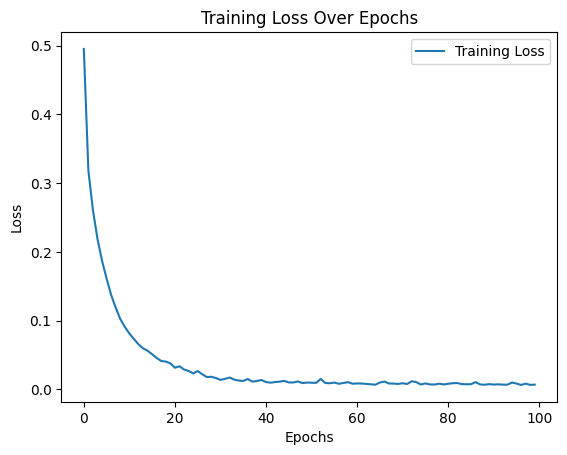

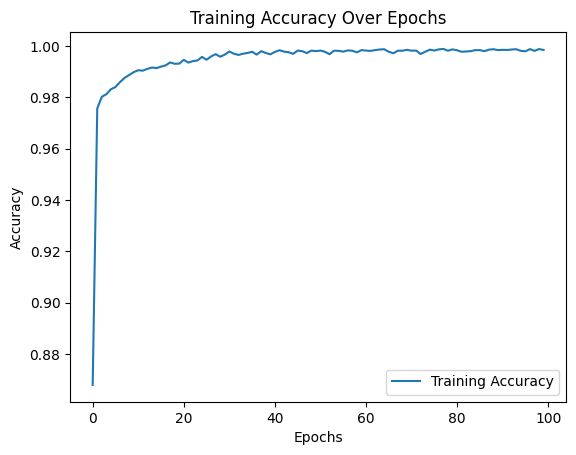

134/134 [==============================] - 0s 1ms/step


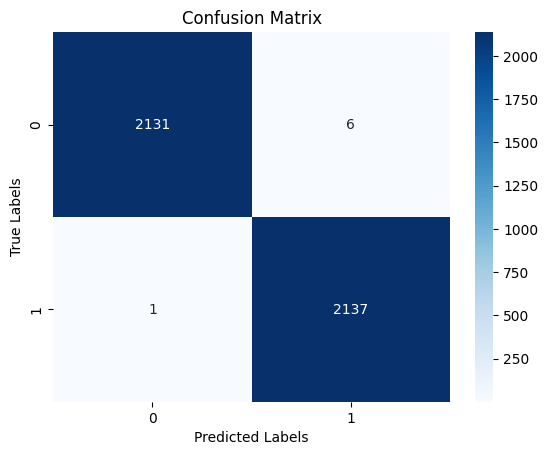

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 소수점 9자리까지 표시
pd.options.display.float_format = '{:.9f}'.format

# df_dos2.csv 파일을 읽어옵니다.
df_dos = pd.read_csv("/content/drive/MyDrive/attack_name_data/df_dos.csv")

# 'label' 열을 제외한 데이터를 dos_loX로 지정합니다.
dos_loX = df_dos.drop(['label'], axis=1)

# 'label' 열을 dosY로 지정합니다.
dosY = df_dos['label']

# MinMaxScaler를 사용하여 데이터를 스케일링합니다.
scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(dos_loX)
dosX = pd.DataFrame(np_scaled, columns=dos_loX.columns)

# RandomUnderSampler를 사용하여 언더샘플링을 수행합니다.
rus = RandomUnderSampler()
dfrus_X, dfrus_Y = rus.fit_resample(dosX, dosY)
dfrus_X = pd.DataFrame(dfrus_X, columns=dosX.columns)

# 훈련 및 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(dfrus_X, dfrus_Y, test_size=0.2, random_state=2022)

# 데이터 차원 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Random Forest 모델 생성
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=42, max_depth=5)
rand_clf.fit(X_train, y_train)

# 훈련 및 테스트 정확도 출력
print('훈련세트 정확도: {:.3f}'.format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}'.format(rand_clf.score(X_test, y_test)))

# DNN 모델 생성
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=22))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 구조 확인
model.summary()

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

# 테스트셋 평가
scores = model.evaluate(X_test, y_test)
print(scores)

# 모델 저장
model.save('/content/drive/MyDrive/DNN_Model/DNN_dos.h5')

# 손실 및 정확도 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 테스트 데이터에 대한 예측 확률
y_pred_prob = model.predict(X_test)

# 확률을 클래스로 변환 (임계값은 예시로 0.5)
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1, 0)

# 혼동 행렬을 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# DNN(U2R)

In [38]:
import pandas as pd
import numpy as np
import sklearn
import sys
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 소수점 9자리까지 표시
pd.options.display.float_format = '{:.9f}'.format

# df_u2r.csv 파일을 읽어옵니다.
df_u2r = pd.read_csv("/content/drive/MyDrive/attack_name_data/df_u2r.csv")

# 'label' 열을 제외한 데이터를 u2r_loX로 지정합니다.
u2r_loX = df_u2r.drop(['label'], axis=1)

# 'label' 열을 u2rY로 지정합니다.
u2rY = df_u2r['label']

# MinMaxScaler를 사용하여 데이터를 스케일링합니다.
scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(u2r_loX)
u2rX = pd.DataFrame(np_scaled, columns=u2r_loX.columns)

# RandomUnderSampler를 사용하여 언더샘플링을 수행합니다.
rus = RandomUnderSampler()
dfrus_X, dfrus_Y = rus.fit_resample(u2rX, u2rY)
dfrus_X = pd.DataFrame(dfrus_X, columns=u2rX.columns)

# 훈련 및 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(dfrus_X, dfrus_Y, test_size=0.2, random_state=2022)

# 데이터 차원 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 배열로 변환
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# DNN 모델 생성
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=22))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# 모델 구조 확인
model.summary()

# 모델 훈련
mod = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_test, y_test))


# 테스트셋 평가
scores = model.evaluate(X_test, y_test)
print(scores)

# 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))
# 모델 저장
model.save('/content/drive/MyDrive/DNN_u2r.h5')

# 손실 그래프
plt.plot(mod.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.plot(mod.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 테스트 데이터에 대한 예측 확률
y_pred_prob = model.predict(X_test)

# 확률을 클래스로 변환 (임계값은 예시로 0.5)
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1, 0)

# 혼동 행렬을 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

(44, 22) (44,)
(12, 22) (12,)
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 64)                1472      
                                                                 
 dropout_109 (Dropout)       (None, 64)                0         
                                                                 
 dense_175 (Dense)           (None, 32)                2080      
                                                                 
 dropout_110 (Dropout)       (None, 32)                0         
                                                                 
 dense_176 (Dense)           (None, 16)                528       
                                                                 
 dropout_111 (Dropout)       (None, 16)                0         
                                                                 
 dense_177 (Dense)     

ValueError: ignored

# DNN(Probe)

(4523, 22) (4523,)
(1131, 22) (1131,)
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 64)                1472      
                                                                 
 dropout_92 (Dropout)        (None, 64)                0         
                                                                 
 dense_151 (Dense)           (None, 32)                2080      
                                                                 
 dropout_93 (Dropout)        (None, 32)                0         
                                                                 
 dense_152 (Dense)           (None, 16)                528       
                                                                 
 dropout_94 (Dropout)        (None, 16)                0         
                                                                 
 dense_153 (Den

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


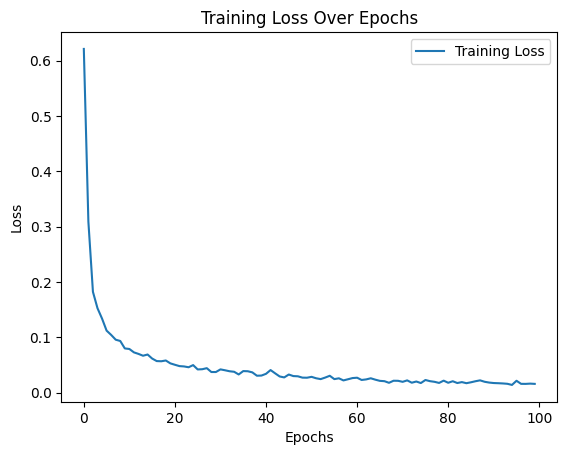

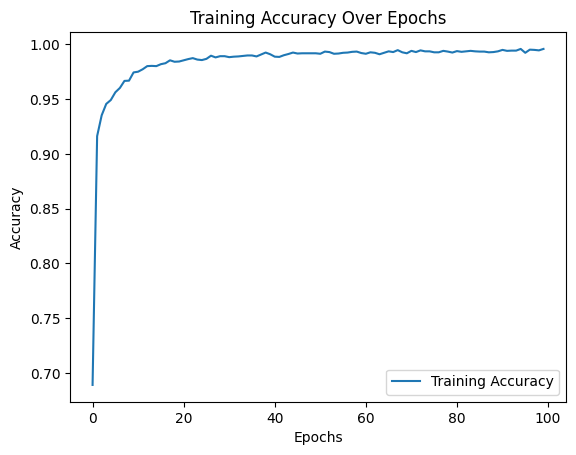

36/36 [==============================] - 0s 2ms/step


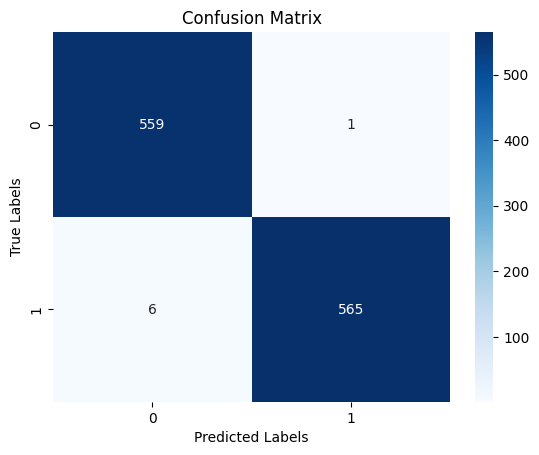

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 소수점 9자리까지 표시
pd.options.display.float_format = '{:.9f}'.format

# df_probe.csv 파일을 읽어옵니다.
df_probe = pd.read_csv("/content/drive/MyDrive/attack_name_data/df_probe.csv")

# 'label' 열을 제외한 데이터를 probe_loX로 지정합니다.
probe_loX = df_probe.drop(['label'], axis=1)

# 'label' 열을 probeY로 지정합니다.
probeY = df_probe['label']

# MinMaxScaler를 사용하여 데이터를 스케일링합니다.
scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(probe_loX)
probeX = pd.DataFrame(np_scaled, columns=probe_loX.columns)

# RandomUnderSampler를 사용하여 언더샘플링을 수행합니다.
rus = RandomUnderSampler()
dfrus_X, dfrus_Y = rus.fit_resample(probeX, probeY)
dfrus_X = pd.DataFrame(dfrus_X, columns=probeX.columns)

# 훈련 및 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(dfrus_X, dfrus_Y, test_size=0.2, random_state=2022)

# 데이터 차원 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 배열로 변환
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# DNN 모델 생성
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=22))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# 모델 구조 확인
model.summary()

# 모델 훈련
mod = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# 테스트셋 평가
scores = model.evaluate(X_test, y_test)
print(scores)

# 모델 저장
model.save('/content/drive/MyDrive/DNN_Model/DNN_probe.h5')

# 손실 그래프
plt.plot(mod.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.plot(mod.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 테스트 데이터에 대한 예측 확률
y_pred_prob = model.predict(X_test)

# 확률을 클래스로 변환 (임계값은 예시로 0.5)
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1, 0)

# 혼동 행렬을 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# DNN(R2L)

(1187, 22) (1187,)
(297, 22) (297,)
훈련세트 정확도: 0.954
테스트세트 정확도: 0.956
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_234 (Dense)           (None, 64)                1472      
                                                                 
 dropout_149 (Dropout)       (None, 64)                0         
                                                                 
 dense_235 (Dense)           (None, 32)                2080      
                                                                 
 dropout_150 (Dropout)       (None, 32)                0         
                                                                 
 dense_236 (Dense)           (None, 16)                528       
                                                                 
 dropout_151 (Dropout)       (None, 16)                0         
                                                  

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


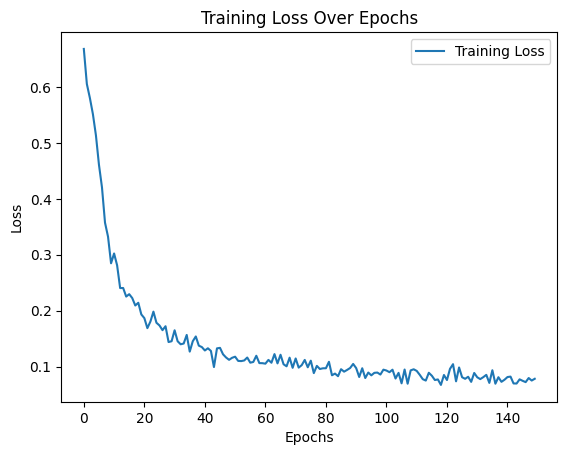

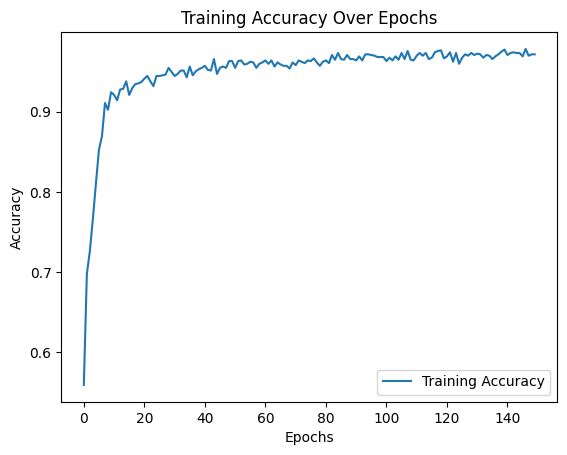

10/10 [==============================] - 0s 2ms/step


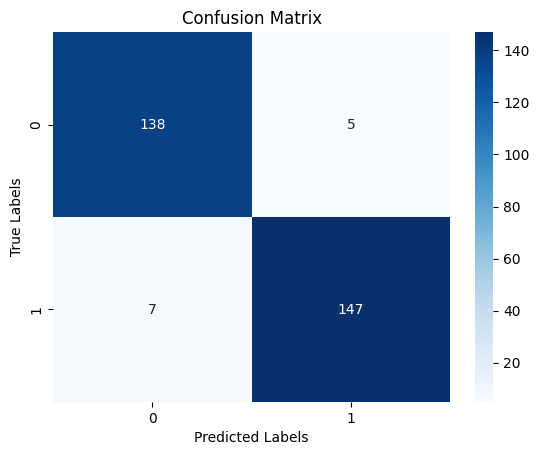

In [51]:
import pandas as pd
import numpy as np
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 소수점 9자리까지 표시
pd.options.display.float_format = '{:.9f}'.format

# df_r2l.csv 파일을 읽어옵니다.
df_r2l = pd.read_csv("/content/drive/MyDrive/attack_name_data/df_r2l.csv")

# 'label' 열을 제외한 데이터를 r2l_loX로 지정합니다.
r2l_loX = df_r2l.drop(['label'], axis=1)

# 'label' 열을 r2lY로 지정합니다.
r2lY = df_r2l['label']

# MinMaxScaler를 사용하여 데이터를 스케일링합니다.
scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(r2l_loX)
r2lX = pd.DataFrame(np_scaled, columns=r2l_loX.columns)

# RandomUnderSampler를 사용하여 언더샘플링을 수행합니다.
rus = RandomUnderSampler()
dfrus_X, dfrus_Y = rus.fit_resample(r2lX, r2lY)
dfrus_X = pd.DataFrame(dfrus_X, columns=r2lX.columns)

# 훈련 및 테스트 데이터로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(dfrus_X, dfrus_Y, test_size=0.2, random_state=2022)

# 데이터 차원 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# # 배열로 변환
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values


# Random Forest 모델 생성
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=42, max_depth=5)
rand_clf.fit(X_train, y_train)

# 훈련 및 테스트 정확도 출력
print('훈련세트 정확도: {:.3f}'.format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}'.format(rand_clf.score(X_test, y_test)))

# DNN 모델 생성
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=22))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 구조 확인
model.summary()

# 모델 훈련
history = model.fit(X_train, y_train, epochs=150, batch_size=8, validation_data=(X_test, y_test))

# 테스트셋 평가
scores = model.evaluate(X_test, y_test)
print(scores)

# 모델 저장
model.save('/content/drive/MyDrive/DNN_Model/DNN_r2l.h5')

# 손실 및 정확도 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 테스트 데이터에 대한 예측 확률
y_pred_prob = model.predict(X_test)

# 확률을 클래스로 변환 (임계값은 예시로 0.5)
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1, 0)

# 혼동 행렬을 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
